In [1]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/Neural_Networks")

In [4]:
df = pd.read_csv(r"gas_turbines.csv")

In [5]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
df.shape

(15039, 11)

In [7]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
#check for duplicate values
df[df.duplicated()].shape

(0, 11)

In [9]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [10]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [11]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


Text(0.5, 1.0, 'Correlation Map of variables')

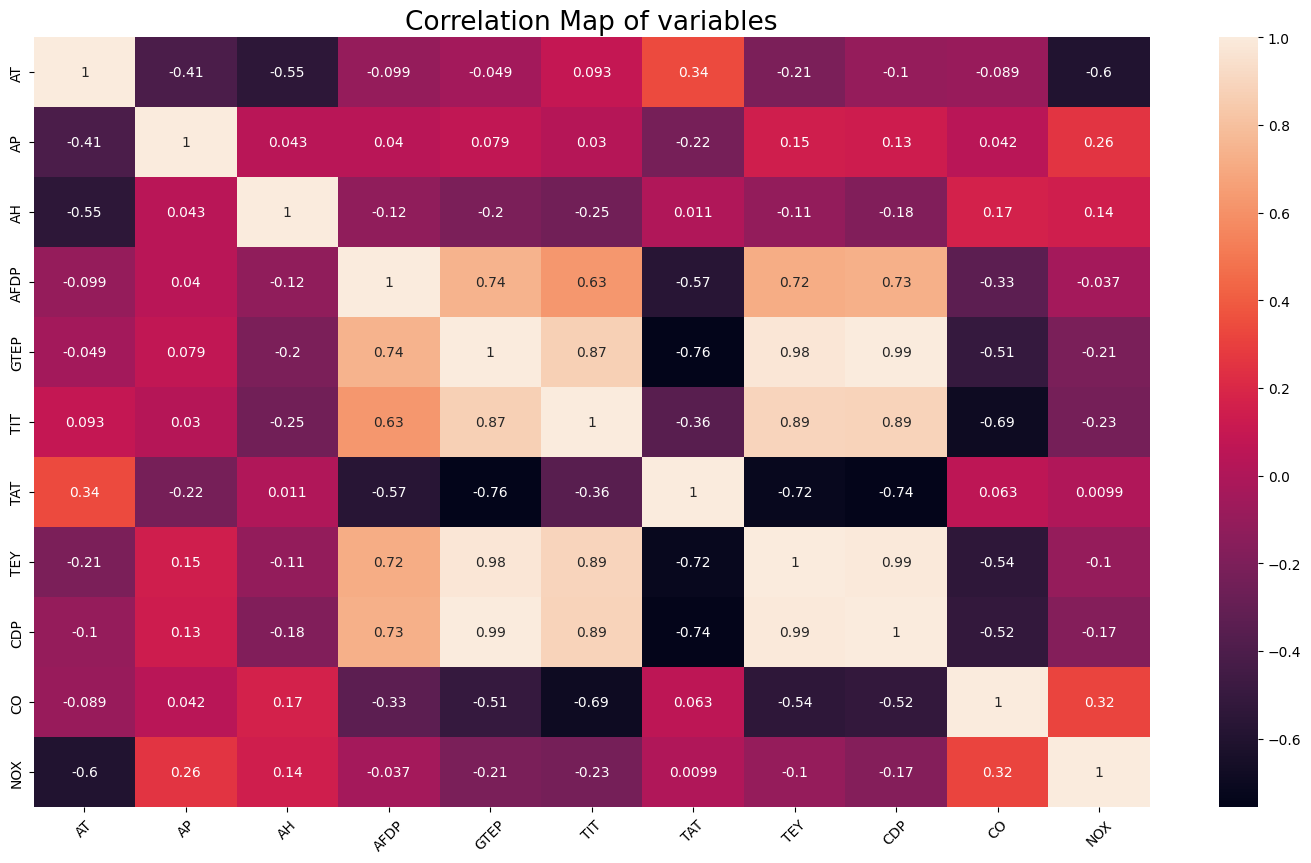

In [12]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [13]:
!pip install ppscore


  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=eb181e03cb1ff80146285ad08188cf068a24e2fa2ab6f6a45c76ae93d614eab4
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [14]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
84,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
95,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
51,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
62,TIT,TEY,0.766040,regression,True,mean absolute error,11.172076,2.613821,DecisionTreeRegressor()
73,TAT,TEY,0.226050,regression,True,mean absolute error,11.172076,8.646631,DecisionTreeRegressor()
40,AFDP,TEY,0.152509,regression,True,mean absolute error,11.172076,9.468234,DecisionTreeRegressor()
106,CO,TEY,0.055869,regression,True,mean absolute error,11.172076,10.547906,DecisionTreeRegressor()
7,AT,TEY,0.000000,regression,True,mean absolute error,11.172076,16.007470,DecisionTreeRegressor()
18,AP,TEY,0.000000,regression,True,mean absolute error,11.172076,12.475617,DecisionTreeRegressor()
29,AH,TEY,0.000000,regression,True,mean absolute error,11.172076,16.950976,DecisionTreeRegressor()


In [15]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:11])
outliers = data1[data1['anamoly']==-1]

In [16]:
outliers

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
261,5.66020,1018.30,86.968,3.8404,21.079,1028.5,523.86,112.02,10.963,43.4280,99.237,-1
553,3.55320,1027.30,90.871,4.2162,21.464,1041.2,531.68,117.76,10.984,8.8254,106.840,-1
763,1.81300,1007.20,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.940,-1
764,1.49880,1006.30,76.734,3.7063,20.041,1027.6,528.79,112.28,10.585,11.6520,112.830,-1
765,0.97877,1005.70,78.978,3.7379,20.084,1027.9,528.52,112.71,10.628,11.6910,108.880,-1
993,4.36570,1021.60,85.528,3.9574,20.263,1025.6,525.72,111.35,10.652,12.7860,112.270,-1
6896,17.13200,1010.80,80.503,2.2148,18.484,1034.1,539.98,102.07,10.182,11.5150,110.760,-1
7019,7.02760,997.23,97.761,2.0992,19.227,1037.2,538.53,109.63,10.338,11.0440,105.060,-1
7470,7.04730,1019.60,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.3740,112.230,-1
9920,15.17900,1017.60,71.630,2.7816,18.435,1027.8,533.45,103.64,10.143,12.1440,113.800,-1


In [17]:
#drop the outliers
df = df.drop(outliers.index)
df.shape

(15023, 11)

In [18]:
#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15018,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15019,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15020,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15021,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [19]:
df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)

In [20]:
df.shape

(15023, 7)

In [22]:
#standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)

In [23]:
temp = df_std.sample(frac=1)
temp_s = df_std.sample(frac=0.1)

In [24]:
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
2485,0.140892,-1.430403,-1.811711,0.579199,-1.610861,-1.713334,1.057034
14716,0.136549,-0.113668,0.233770,0.600860,0.014820,-0.240370,-0.213780
7326,-1.799880,-0.452141,-0.076705,0.585570,-0.093938,-0.288441,0.121773
12804,-0.160655,0.108065,0.544245,0.600860,-0.030707,0.107917,-0.844037
2115,0.844414,-0.153700,0.258121,0.628893,0.029363,-0.089808,-0.184885
...,...,...,...,...,...,...,...
6615,0.313054,-0.359852,0.105927,0.571554,-0.109114,-0.165996,-0.316822
436,0.699366,-0.507035,-0.368916,0.571554,-0.339276,-0.570517,-0.106309
3895,0.110093,0.086251,0.452929,0.553715,0.025569,0.136941,0.199417
10065,-0.747296,-0.132126,0.276384,0.605957,-0.031339,-0.016342,-0.500286


In [25]:
#Splitting data into target variable and independent variables
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

,AFDP,GTEP,TIT,TAT,CDP,CO
2485,0.140892,-1.430403,-1.811711,0.579199,-1.713334,1.057034
14716,0.136549,-0.113668,0.233770,0.600860,-0.240370,-0.213780
7326,-1.799880,-0.452141,-0.076705,0.585570,-0.288441,0.121773
12804,-0.160655,0.108065,0.544245,0.600860,0.107917,-0.844037
2115,0.844414,-0.153700,0.258121,0.628893,-0.089808,-0.184885
...,...,...,...,...,...,...
6615,0.313054,-0.359852,0.105927,0.571554,-0.165996,-0.316822
436,0.699366,-0.507035,-0.368916,0.571554,-0.570517,-0.106309
3895,0.110093,0.086251,0.452929,0.553715,0.136941,0.199417
10065,-0.747296,-0.132126,0.276384,0.605957,-0.016342,-0.500286


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [27]:

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1126, 6), (376, 6), (1126,), (376,))

In [28]:
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [30]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [31]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [32]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [34]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of this model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________



KeyboardInterrupt



In [35]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 101ms/step


array([[ 0.83409137],
       [-0.02572449],
       [-0.03761596],
       [ 1.986462  ],
       [-0.03519446],
       [ 1.943102  ],
       [ 0.03618067],
       [-0.01861151],
       [-0.04806387],
       [-1.5053756 ]], dtype=float32)

In [36]:
print('Actual values')
y_test[:10]

Actual values


11707    0.838726
14760   -0.000988
9192    -0.035765
8821     2.156470
7729    -0.034500
14315    1.804271
4486    -0.029442
4133     0.033790
7049    -0.065484
642     -1.359832
Name: TEY, dtype: float64

In [37]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mape, '\n')

36/36 [==============================] - 0s 4ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0460 - mape: 77.7419

 Results for model 2: 
 Training Loss: 0.003822960192337632 
 Training Mean Absolute Error: 0.003822960192337632 
 Training Mean Squared Error: 77.74185943603516 



In [38]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mape, '\n')

12/12 [==============================] - 0s 3ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0594 - mape: 79.7927

 Results for model 2: 
 Test Loss: 0.00705031119287014 
 Test Mean Absolute Error: 0.00705031119287014 
 Test Mean Squared Error: 79.79270935058594 



In [39]:
# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
# Define the grid search parameters
batch_size = [30,50,70]
epochs = [300,500,800]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=300...................................


[CV 1/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.008 total time=  42.5s
[CV 2/5; 1/9] START batch_size=30, epochs=300...................................


[CV 2/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.006 total time=  42.3s
[CV 3/5; 1/9] START batch_size=30, epochs=300...................................


[CV 3/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.006 total time=  37.9s
[CV 4/5; 1/9] START batch_size=30, epochs=300...................................


[CV 4/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.008 total time=  35.9s
[CV 5/5; 1/9] START batch_size=30, epochs=300...................................


[CV 5/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.010 total time=  37.3s
[CV 1/5; 2/9] START batch_size=30, epochs=500...................................


[CV 1/5; 2/9] END ...batch_size=30, epochs=500;, score=-0.008 total time=  47.5s
[CV 2/5; 2/9] START batch_size=30, epochs=500...................................


[CV 2/5; 2/9] END ...batch_size=30, epochs=500;, score=-0.006 total time= 1.4min
[CV 3/5; 2/9] START batch_size=30, epochs=500...................................


[CV 3/5; 2/9] END ...batch_size=30, epochs=500;, score=-0.006 total time=  59.0s
[CV 4/5; 2/9] START batch_size=30, epochs=500...................................


[CV 4/5; 2/9] END ...batch_size=30, epochs=500;, score=-0.008 total time=  57.2s
[CV 5/5; 2/9] START batch_size=30, epochs=500...................................


[CV 5/5; 2/9] END ...batch_size=30, epochs=500;, score=-0.008 total time=  58.0s
[CV 1/5; 3/9] START batch_size=30, epochs=800...................................


[CV 1/5; 3/9] END ...batch_size=30, epochs=800;, score=-0.010 total time= 1.4min
[CV 2/5; 3/9] START batch_size=30, epochs=800...................................


[CV 2/5; 3/9] END ...batch_size=30, epochs=800;, score=-0.007 total time= 2.4min
[CV 3/5; 3/9] START batch_size=30, epochs=800...................................


[CV 3/5; 3/9] END ...batch_size=30, epochs=800;, score=-0.006 total time= 1.5min
[CV 4/5; 3/9] START batch_size=30, epochs=800...................................


[CV 4/5; 3/9] END ...batch_size=30, epochs=800;, score=-0.013 total time= 1.5min
[CV 5/5; 3/9] START batch_size=30, epochs=800...................................


[CV 5/5; 3/9] END ...batch_size=30, epochs=800;, score=-0.007 total time= 1.5min
[CV 1/5; 4/9] START batch_size=50, epochs=300...................................


[CV 1/5; 4/9] END ...batch_size=50, epochs=300;, score=-0.007 total time=  20.4s
[CV 2/5; 4/9] START batch_size=50, epochs=300...................................


[CV 2/5; 4/9] END ...batch_size=50, epochs=300;, score=-0.007 total time=  23.4s
[CV 3/5; 4/9] START batch_size=50, epochs=300...................................


[CV 3/5; 4/9] END ...batch_size=50, epochs=300;, score=-0.014 total time=  42.2s
[CV 4/5; 4/9] START batch_size=50, epochs=300...................................


[CV 4/5; 4/9] END ...batch_size=50, epochs=300;, score=-0.008 total time=  23.7s
[CV 5/5; 4/9] START batch_size=50, epochs=300...................................


[CV 5/5; 4/9] END ...batch_size=50, epochs=300;, score=-0.008 total time=  42.3s
[CV 1/5; 5/9] START batch_size=50, epochs=500...................................


[CV 1/5; 5/9] END ...batch_size=50, epochs=500;, score=-0.007 total time=  42.0s
[CV 2/5; 5/9] START batch_size=50, epochs=500...................................


[CV 2/5; 5/9] END ...batch_size=50, epochs=500;, score=-0.006 total time=  38.1s
[CV 3/5; 5/9] START batch_size=50, epochs=500...................................


[CV 3/5; 5/9] END ...batch_size=50, epochs=500;, score=-0.007 total time=  37.4s
[CV 4/5; 5/9] START batch_size=50, epochs=500...................................


[CV 4/5; 5/9] END ...batch_size=50, epochs=500;, score=-0.010 total time=  42.3s
[CV 5/5; 5/9] START batch_size=50, epochs=500...................................


[CV 5/5; 5/9] END ...batch_size=50, epochs=500;, score=-0.009 total time=  42.7s
[CV 1/5; 6/9] START batch_size=50, epochs=800...................................


[CV 1/5; 6/9] END ...batch_size=50, epochs=800;, score=-0.008 total time= 1.4min
[CV 2/5; 6/9] START batch_size=50, epochs=800...................................


[CV 2/5; 6/9] END ...batch_size=50, epochs=800;, score=-0.006 total time= 1.0min
[CV 3/5; 6/9] START batch_size=50, epochs=800...................................


[CV 3/5; 6/9] END ...batch_size=50, epochs=800;, score=-0.006 total time= 1.1min
[CV 4/5; 6/9] START batch_size=50, epochs=800...................................


[CV 4/5; 6/9] END ...batch_size=50, epochs=800;, score=-0.008 total time= 1.0min
[CV 5/5; 6/9] START batch_size=50, epochs=800...................................


[CV 5/5; 6/9] END ...batch_size=50, epochs=800;, score=-0.007 total time= 1.0min
[CV 1/5; 7/9] START batch_size=70, epochs=300...................................


[CV 1/5; 7/9] END ...batch_size=70, epochs=300;, score=-0.009 total time=  22.0s
[CV 2/5; 7/9] START batch_size=70, epochs=300...................................


[CV 2/5; 7/9] END ...batch_size=70, epochs=300;, score=-0.007 total time=  18.3s
[CV 3/5; 7/9] START batch_size=70, epochs=300...................................


[CV 3/5; 7/9] END ...batch_size=70, epochs=300;, score=-0.007 total time=  19.5s
[CV 4/5; 7/9] START batch_size=70, epochs=300...................................


[CV 4/5; 7/9] END ...batch_size=70, epochs=300;, score=-0.010 total time=  17.5s
[CV 5/5; 7/9] START batch_size=70, epochs=300...................................


[CV 5/5; 7/9] END ...batch_size=70, epochs=300;, score=-0.008 total time=  17.8s
[CV 1/5; 8/9] START batch_size=70, epochs=500...................................


[CV 1/5; 8/9] END ...batch_size=70, epochs=500;, score=-0.010 total time=  43.3s
[CV 2/5; 8/9] START batch_size=70, epochs=500...................................


[CV 2/5; 8/9] END ...batch_size=70, epochs=500;, score=-0.007 total time=  42.1s
[CV 3/5; 8/9] START batch_size=70, epochs=500...................................


[CV 3/5; 8/9] END ...batch_size=70, epochs=500;, score=-0.006 total time=  28.1s
[CV 4/5; 8/9] START batch_size=70, epochs=500...................................


[CV 4/5; 8/9] END ...batch_size=70, epochs=500;, score=-0.009 total time=  28.7s
[CV 5/5; 8/9] START batch_size=70, epochs=500...................................


[CV 5/5; 8/9] END ...batch_size=70, epochs=500;, score=-0.008 total time=  27.2s
[CV 1/5; 9/9] START batch_size=70, epochs=800...................................


[CV 1/5; 9/9] END ...batch_size=70, epochs=800;, score=-0.008 total time=  43.0s
[CV 2/5; 9/9] START batch_size=70, epochs=800...................................


[CV 2/5; 9/9] END ...batch_size=70, epochs=800;, score=-0.006 total time= 1.4min
[CV 3/5; 9/9] START batch_size=70, epochs=800...................................


[CV 3/5; 9/9] END ...batch_size=70, epochs=800;, score=-0.006 total time=  43.2s
[CV 4/5; 9/9] START batch_size=70, epochs=800...................................


[CV 4/5; 9/9] END ...batch_size=70, epochs=800;, score=-0.008 total time= 1.4min
[CV 5/5; 9/9] START batch_size=70, epochs=800...................................


[CV 5/5; 9/9] END ...batch_size=70, epochs=800;, score=-0.007 total time=  42.0s


In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0069927599281072615, using {'batch_size': 50, 'epochs': 800}
-0.00775348050519824,0.001466297385451011 with: {'batch_size': 30, 'epochs': 300}
-0.00723244696855545,0.0010581567188226277 with: {'batch_size': 30, 'epochs': 500}
-0.008447097893804312,0.0025175476353622144 with: {'batch_size': 30, 'epochs': 800}
-0.00884351134300232,0.0028449911120544385 with: {'batch_size': 50, 'epochs': 300}
-0.007736122887581587,0.001423174646549425 with: {'batch_size': 50, 'epochs': 500}
-0.0069927599281072615,0.0009118950346603912 with: {'batch_size': 50, 'epochs': 800}
-0.007996735069900751,0.0013115314048957178 with: {'batch_size': 70, 'epochs': 300}
-0.007963004149496555,0.0013788214112428038 with: {'batch_size': 70, 'epochs': 500}
-0.00703602060675621,0.0008201989800730258 with: {'batch_size': 70, 'epochs': 800}


In [41]:
# Defining the model
%%time
def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 15min 26s, sys: 50 s, total: 16min 16s
Wall time: 15min 45s


In [42]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.007232699077576399, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.008079278655350209,0.00048671678781149626 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.007232699077576399,0.0011342790527414403 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.007536184880882502,0.0007297872170852111 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.009522247593849897,0.0017361923577782817 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.010924081224948168,0.00241984409384861 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.010963253490626813,0.0018566427573403 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.012847571447491647,0.0014950852970147333 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.01190603245049715,0.0026643890963368253 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.011529575847089291,0.0021765556547786295 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [43]:
# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning
%%time
def create_model_three_hidden_layers(activation_function,init):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = init,activation = activation_function))

    model.add(Dense(32,kernel_initializer = init,activation = activation_function))

    model.add(Dense(64,kernel_initializer = init,activation = activation_function))

    model.add(Dense(128,kernel_initializer = init,activation = activation_function))

    model.add(Dense(1))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)


CPU times: user 19min 46s, sys: 1min 3s, total: 20min 50s
Wall time: 19min 46s


In [44]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.006993462704122067, using {'activation_function': 'relu', 'init': 'uniform'}
-1.0413148045539855,0.03564474642823394 with: {'activation_function': 'softmax', 'init': 'uniform'}
-0.019924930669367312,0.005513748167776451 with: {'activation_function': 'softmax', 'init': 'normal'}
-1.0412774085998535,0.03568480455086288 with: {'activation_function': 'softmax', 'init': 'zero'}
-0.006993462704122067,0.0009349130722018438 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.008039937540888786,0.0015929392042871018 with: {'activation_function': 'relu', 'init': 'normal'}
-1.0413495540618896,0.03561887800214588 with: {'activation_function': 'relu', 'init': 'zero'}
-0.014975016377866269,0.003122214031191524 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.01150165069848299,0.0023135395179702404 with: {'activation_function': 'tanh', 'init': 'normal'}
-1.040880024433136,0.03543077657122378 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.014067983627319336,0.001

In [45]:
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [46]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of our final model:
Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_774 (Dense)           (None, 8)                 56        
                                                                 
 dense_775 (Dense)           (None, 128)               1152      
                                                                 
 dense_776 (Dense)           (None, 64)                8256      
                                                                 
 dense_777 (Dense)           (None, 128)               8320      
                                                                 
 dense_778 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________
CPU time

In [47]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mape, '\n')

36/36 [==============================] - 0s 4ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0571 - mape: 136.0167

 Results for final model : 
 Training Loss: 0.006332019809633493 
 Training Mean Absolute Error: 0.006332019809633493 
 Training Mean Squared Error: 136.01666259765625 



In [48]:
loss_t, mae_t, mse_t, mape_t = final_model.evaluate(x_test, y_test)
print('\n', "Results for final model :", '\n', "Test Loss:", loss_t, '\n', "Test Mean Absolute Error:" , mae_t, '\n', "Test Mean Squared Error:", mse_t)


12/12 [==============================] - 0s 3ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0598 - mape: 118.0639

 Results for final model : 
 Test Loss: 0.006979033816605806 
 Test Mean Absolute Error: 0.006979033816605806 
 Test Mean Squared Error: 0.059821829199790955
